In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
page_numbers_list = []
page_numbers = range(1, 71)
for page in page_numbers:
    href = "https://www.nysenate.gov/search/legislation?sort=desc&type=f_bill&searched=true&bill_session_year=2021&bill_status=SIGNED_BY_GOV&page=" + str(page)
    page_numbers_list = href
    print(href)

https://www.nysenate.gov/search/legislation?sort=desc&type=f_bill&searched=true&bill_session_year=2021&bill_status=SIGNED_BY_GOV&page=1
https://www.nysenate.gov/search/legislation?sort=desc&type=f_bill&searched=true&bill_session_year=2021&bill_status=SIGNED_BY_GOV&page=2
https://www.nysenate.gov/search/legislation?sort=desc&type=f_bill&searched=true&bill_session_year=2021&bill_status=SIGNED_BY_GOV&page=3
https://www.nysenate.gov/search/legislation?sort=desc&type=f_bill&searched=true&bill_session_year=2021&bill_status=SIGNED_BY_GOV&page=4
https://www.nysenate.gov/search/legislation?sort=desc&type=f_bill&searched=true&bill_session_year=2021&bill_status=SIGNED_BY_GOV&page=5
https://www.nysenate.gov/search/legislation?sort=desc&type=f_bill&searched=true&bill_session_year=2021&bill_status=SIGNED_BY_GOV&page=6
https://www.nysenate.gov/search/legislation?sort=desc&type=f_bill&searched=true&bill_session_year=2021&bill_status=SIGNED_BY_GOV&page=7
https://www.nysenate.gov/search/legislation?sort

In [3]:
def signed_bills(href):
    raw_html = requests.get(href).content
    soup_doc = BeautifulSoup(raw_html, "html.parser")
    
    all_bills = soup_doc.find_all("div", class_="c-block c-list-item c-block-legislation")

    signed_bills_list_of_dicts = []

    for bill in all_bills:
        bill_number = bill.find("h3", class_="c-bill-num").text.replace("\n", "").replace("Bill ", "").strip()
        bill_link = bill.find("h3", class_="c-bill-num").find("a")['href']
        bill_description = bill.find("p", class_="c-bill-descript").text.replace("\n", "")
        bill_date = bill.find("p", class_="c-bill-update--date").text.replace("\n", "").replace("|  Signed by Governor", "")
        bill_sponsor_tag = bill.find("p", class_="c-bill-update--sponsor")
        if bill_sponsor_tag != None:
            bill_sponsor = bill_sponsor_tag.text.replace("\n", "").replace("Sponsor:", "")
        else:
            bill_sponsor = ""
        signed_bills_list_of_dicts.append(
            {"bill_number": bill_number, "bill_link": "https://www.nysenate.gov" + bill_link, "bill_description": bill_description,
             "bill_date": bill_date, "bill_sponsor": bill_sponsor}
        )
        
    
    return signed_bills_list_of_dicts

In [4]:
page_numbers_main_list = []
page_numbers = range(1, 71)
for page in page_numbers:
    href = "https://www.nysenate.gov/search/legislation?sort=desc&type=f_bill&searched=true&bill_session_year=2021&bill_status=SIGNED_BY_GOV&page=" + str(page)
    bill_list = signed_bills(href)
    
    page_numbers_main_list.extend(bill_list)

In [5]:
import pandas as pd
df_bills = pd.DataFrame(page_numbers_main_list)
pd.set_option("display.max_colwidth", None)
df_bills

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,bill_number,bill_link,bill_description,bill_date,bill_sponsor
0,A9002,https://www.nysenate.gov/legislation/bills/2021/a9002,DEBT SERVICE FUND--GENERAL DEBT SERVICE FUND,"April 9, 2022 | Signed by Governor",
1,S8748,https://www.nysenate.gov/legislation/bills/2021/s8748,"Enacts major components relating to compensation, benefits and other terms and conditions of employment of various units; repeals certain provisions relating thereto","April 9, 2022 | Signed by Governor",JACKSON
2,S8715,https://www.nysenate.gov/legislation/bills/2021/s8715,"Provides for emergency appropriation for the period April 1, 2022 through April 7, 2022","April 4, 2022 | Signed by Governor",KRUEGER
3,A9607,https://www.nysenate.gov/legislation/bills/2021/a9607,Extends the time for certain public officers to take or file their oaths of office or official undertakings,"April 1, 2022 | Signed by Governor",HEASTIE
4,S7619,https://www.nysenate.gov/legislation/bills/2021/s7619,Extends the effectiveness of provisions relating to absentee ballots for school district elections during a declared disaster emergency,"March 26, 2022 | Signed by Governor",MAYER
...,...,...,...,...,...
690,A1251,https://www.nysenate.gov/legislation/bills/2021/a1251,Relates to the direct deposit of workers' compensation benefits,"January 28, 2021 | Signed by Governor",REYES
691,A1252,https://www.nysenate.gov/legislation/bills/2021/a1252,Relates to the authority of assessment corporations to write insurance,"January 28, 2021 | Signed by Governor",GUNTHER
692,S1197,https://www.nysenate.gov/legislation/bills/2021/s1197,Prohibits the inclusion of claims for unemployment insurance arising from the closure of an employer due to COVID-19 from being included in such employer's experience rating charges,"January 28, 2021 | Signed by Governor",PERSAUD
693,S2733,https://www.nysenate.gov/legislation/bills/2021/s2733,Reduces the number of signatures for designating petitions,"January 28, 2021 | Signed by Governor",MAY


In [6]:
# df_bills.to_excel("all_bills.xlsx")

# ----------------------------------------------------------------------------------------

# Getting law categories

In [7]:
def signed_bills_law_section(href):
    raw_html = requests.get(href).content
    soup_doc = BeautifulSoup(raw_html, "html.parser")
    
    law_section = soup_doc.find_all("div", class_="c-block c-bill-section c-bill--details")[0].find_all("dd")[1].text
    return law_section

In [8]:
bill_new_numbers = [bill_dict["bill_number"] for bill_dict in page_numbers_main_list]

In [9]:
print(bill_new_numbers)

['A9002', 'S8748', 'S8715', 'A9607', 'S7619', 'S7692', 'S7695', 'S7698', 'S7699', 'S7703', 'S7704', 'S7705', 'S7711', 'S7716', 'S7726', 'S7729', 'S7733', 'S7734', 'S7766', 'S7773', 'S7782', 'S7790', 'S7792', 'S7797', 'S7808', 'S7801', 'A8758', 'A8773', 'S7819', 'S7826', 'S7828', 'S7830', 'S7836', 'S7844', 'S7870', 'S8288', 'S5870', 'S7694', 'S7700', 'S7689', 'S7690', 'S7701', 'S7706', 'S7707', 'S7708', 'S7709', 'S7710', 'A8592', 'A8690', 'A8693', 'A8694', 'A8698', 'A8700', 'S7712', 'S7713', 'S7715', 'S7717', 'S7718', 'S7719', 'S7720', 'S7721', 'S7727', 'S7728', 'S7735', 'S7736', 'S7738', 'S7730', 'S7731', 'S7732', 'A8704', 'S7764', 'S7760', 'S7761', 'S7767', 'A8706', 'A8708', 'A8710', 'A8714', 'A8716', 'S7776', 'S7770', 'S7771', 'S7775', 'S7783', 'A8717', 'A8720', 'A8721', 'A8724', 'A8726', 'A8728', 'A8732', 'A8739', 'S7784', 'S7786', 'A8744', 'A8746', 'A8749', 'S7787', 'S7788', 'S7794', 'S7795', 'S7796', 'S7803', 'S7805', 'S7806', 'S7807', 'S7800', 'A8751', 'A8754', 'A8762', 'A8754', 

In [10]:
bill_numbers_main_list = []
for bill in bill_new_numbers:
    href = "https://www.nysenate.gov/legislation/bills/2021/" + bill
    bill_list_sections = signed_bills_law_section(href)
    
    bill_numbers_main_list.append({"bill_number": bill, "bill_section": bill_list_sections})

In [11]:
df_bill_sections = pd.DataFrame(bill_numbers_main_list)
pd.set_option("display.max_colwidth", None)
df_bill_sections

,bill_number,bill_section
0,A9002,Budget Bills
1,S8748,Civil Service Law
2,S8715,Appropriations
3,A9607,Public Officers
4,S7619,Education
...,...,...
690,A1251,Workers' Compensation Law
691,A1252,Insurance Law
692,S1197,Labor Law
693,S2733,Election Law


In [12]:
df_bills.set_index('bill_number').join(df_bill_sections.set_index('bill_number'))

,bill_link,bill_description,bill_date,bill_sponsor,bill_section
bill_number,,,,,
A1237,https://www.nysenate.gov/legislation/bills/2021/a1237,Provides for the remote conduct of certain practices and procedures relating to board meetings,"November 8, 2021 | Signed by Governor",PAULIN,Business Corporation Law
A1249,https://www.nysenate.gov/legislation/bills/2021/a1249,"Relates to the correctional association's ability to access, visit, inspect, and examine all state correctional facilities","February 16, 2021 | Signed by Governor",WEPRIN,Correction Law
A1250,https://www.nysenate.gov/legislation/bills/2021/a1250,Directs the commissioner of mental health to create a workgroup and report regarding frontline worker trauma informed care; repealer,"February 16, 2021 | Signed by Governor",GUNTHER,Mental Hygiene
A1251,https://www.nysenate.gov/legislation/bills/2021/a1251,Relates to the direct deposit of workers' compensation benefits,"January 28, 2021 | Signed by Governor",REYES,Workers' Compensation Law
A1252,https://www.nysenate.gov/legislation/bills/2021/a1252,Relates to the authority of assessment corporations to write insurance,"January 28, 2021 | Signed by Governor",GUNTHER,Insurance Law
...,...,...,...,...,...
S901,https://www.nysenate.gov/legislation/bills/2021/s901,Relates to supermarkets providing excess edible food to food relief organizations,"February 16, 2021 | Signed by Governor",HARCKHAM,Environmental Conservation Law
S901,https://www.nysenate.gov/legislation/bills/2021/s901,Relates to supermarkets providing excess edible food to food relief organizations,"February 16, 2021 | Signed by Governor",HARCKHAM,Environmental Conservation Law
S901,https://www.nysenate.gov/legislation/bills/2021/s901,Relates to supermarkets providing excess edible food to food relief organizations,"February 16, 2021 | Signed by Governor",HARCKHAM,Environmental Conservation Law


In [13]:
df_bills.shape

(695, 5)

In [14]:
df_bill_sections.shape

(695, 2)

In [15]:
df = df_bills.join(df_bill_sections.set_index('bill_number'), on='bill_number')

In [16]:
df.columns

Index(['bill_number', 'bill_link', 'bill_description', 'bill_date',
       'bill_sponsor', 'bill_section'],
      dtype='object')

In [17]:
df.bill_number.nunique()

689

In [18]:
df_bills.bill_number.nunique()

689

In [19]:
df_bill_sections.bill_number.nunique()

689

In [20]:
df

,bill_number,bill_link,bill_description,bill_date,bill_sponsor,bill_section
0,A9002,https://www.nysenate.gov/legislation/bills/2021/a9002,DEBT SERVICE FUND--GENERAL DEBT SERVICE FUND,"April 9, 2022 | Signed by Governor",,Budget Bills
1,S8748,https://www.nysenate.gov/legislation/bills/2021/s8748,"Enacts major components relating to compensation, benefits and other terms and conditions of employment of various units; repeals certain provisions relating thereto","April 9, 2022 | Signed by Governor",JACKSON,Civil Service Law
2,S8715,https://www.nysenate.gov/legislation/bills/2021/s8715,"Provides for emergency appropriation for the period April 1, 2022 through April 7, 2022","April 4, 2022 | Signed by Governor",KRUEGER,Appropriations
3,A9607,https://www.nysenate.gov/legislation/bills/2021/a9607,Extends the time for certain public officers to take or file their oaths of office or official undertakings,"April 1, 2022 | Signed by Governor",HEASTIE,Public Officers
4,S7619,https://www.nysenate.gov/legislation/bills/2021/s7619,Extends the effectiveness of provisions relating to absentee ballots for school district elections during a declared disaster emergency,"March 26, 2022 | Signed by Governor",MAYER,Education
...,...,...,...,...,...,...
690,A1251,https://www.nysenate.gov/legislation/bills/2021/a1251,Relates to the direct deposit of workers' compensation benefits,"January 28, 2021 | Signed by Governor",REYES,Workers' Compensation Law
691,A1252,https://www.nysenate.gov/legislation/bills/2021/a1252,Relates to the authority of assessment corporations to write insurance,"January 28, 2021 | Signed by Governor",GUNTHER,Insurance Law
692,S1197,https://www.nysenate.gov/legislation/bills/2021/s1197,Prohibits the inclusion of claims for unemployment insurance arising from the closure of an employer due to COVID-19 from being included in such employer's experience rating charges,"January 28, 2021 | Signed by Governor",PERSAUD,Labor Law
693,S2733,https://www.nysenate.gov/legislation/bills/2021/s2733,Reduces the number of signatures for designating petitions,"January 28, 2021 | Signed by Governor",MAY,Election Law


<AxesSubplot:>

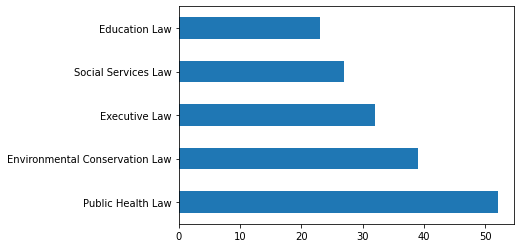

In [21]:
df.bill_section.value_counts().head(5).plot(kind='barh')